In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.__version__ #pandas version

'0.17.1'

# Establish Connection to DB through SSH

In [3]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
import sys
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG) 
import paramiko
#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#ssh.connect('ssicluster2.tk.informatik.tu-darmstadt.de',port = 12822, username='arun',password='ArunDss@123',allow_agent=False,look_for_keys=False)
localhost = '127.0.0.1'
user = 'root'
password='kUrsVbpyfFWF'
database = 'Energy_AD'
def query(q):
     with SSHTunnelForwarder(
          ('ssicluster2.tk.informatik.tu-darmstadt.de', 12822),
          allow_agent=False,
          ssh_username='arun',
          ssh_password = 'ArunDss@123',
          #remote_bind_address=('130.83.163.8', 3306)
          remote_bind_address=('127.0.0.1', 3306)
           
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)

          return pd.read_sql_query(q, conn)

# Run the desired query 

In [4]:
#!/home/arun/anaconda2/bin/python
import MySQLdb as db1
import pandas as pd
import datetime
import pandas.io.sql as psql

now = datetime.datetime.now()
print "Start date and time using str method of datetime object:"
print str(now)

chunk_size = 604800
offset = 4654987
location = 'Torschlag_Trafo' + '%'
list_data = []
#Uncomment and run the below query to read all the data of particular location
#while True:
#    q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s" % (location,chunk_size))
#    print(q)
#    list_data.append(query(q))
#    offset += chunk_size
#    if len(list_data[-1]) < chunk_size:
#        break
#print("Query executed")
# print("Concatenating....")
# dfs = pd.concat(list_data)

#To read only specific rows of data
q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s OFFSET %s" % (location,chunk_size,offset))
print(q)
list_data.append(query(q))
dfs = pd.concat(list_data)



now1 = datetime.datetime.now()
print "End date and time using str method of datetime object:"
print str(now1)

print("Execution Completed")







Start date and time using str method of datetime object:
2016-12-23 17:32:44.580577
SELECT * FROM energy_sample_data1 where location like 'Torschlag_Trafo%' ORDER BY Serial_no LIMIT 604800 OFFSET 4654987
End date and time using str method of datetime object:
2016-12-23 17:37:21.987547
Execution Completed


In [5]:
dfs.shape

(604800, 16)

In [6]:
dfs.head()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
0,69520720,2015-12-26,23:59:59,237.14,236.80,236.57,4.74,19.89,10.94,14.77,8191.64,8426.93,0.86,13455,12801662.72,Torschlag_Trafo_26122015.csv
1,69565391,2016-01-27,00:00:00,232.55,232.18,231.90,7.75,33.33,18.54,27.28,13413.95,13841.15,0.86,23911,27846760.96,Torschlag_Trafo_27012016.csv
2,69565392,2016-01-27,00:00:01,232.55,232.18,231.90,7.75,33.33,18.54,27.28,13413.95,13841.15,0.86,23911,27846760.96,Torschlag_Trafo_27012016.csv
3,69565393,2016-01-27,00:00:02,232.55,232.18,231.90,7.75,33.33,18.54,27.28,13413.95,13841.15,0.86,23911,27846760.96,Torschlag_Trafo_27012016.csv
4,69565394,2016-01-27,00:00:03,232.55,232.18,231.90,7.75,33.33,18.54,27.65,13413.95,13841.15,0.86,23911,27846760.96,Torschlag_Trafo_27012016.csv


In [7]:
dfs.tail()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
604795,70438206,2016-01-30,23:59:55,233.13,232.80,232.42,8.2,14.74,11.79,8.62,7675.06,8087.81,0.93,24110,29741783.04,Torschlag_Trafo_30012016.csv
604796,70438207,2016-01-30,23:59:56,233.13,232.80,232.42,8.2,14.74,11.79,8.62,7675.06,8087.81,0.93,24110,29741783.04,Torschlag_Trafo_30012016.csv
604797,70438208,2016-01-30,23:59:57,233.13,232.80,232.42,8.2,14.74,11.79,9.10,7675.06,8087.81,0.93,24110,29741783.04,Torschlag_Trafo_30012016.csv
604798,70438209,2016-01-30,23:59:58,233.21,233.31,233.43,8.3,14.60,11.92,9.10,7753.93,8124.61,0.93,24110,29741793.28,Torschlag_Trafo_30012016.csv
604799,70438210,2016-01-30,23:59:59,233.21,233.31,233.43,8.3,14.60,11.92,9.10,7753.93,8124.61,0.93,24110,29741793.28,Torschlag_Trafo_30012016.csv


# Read the saved CSV


In [ ]:
dfs = pd.read_csv('Torschlag_df.csv',sep=',')

In [ ]:
dfs.shape #DataFrame containing all fields of Siedlerstr_Trafo

In [ ]:
columns_list = dfs.columns

# Run the below code when data is read from SQL

In [8]:
cols = 'DESC energy_sample_data1 '
columns_list = query(cols)

In [9]:
cols_sql = pd.DataFrame(columns_list)
print("Columns names:")
print(cols_sql.iloc[:,0])

Columns names:
0     Serial_no
1          Date
2          Time
3            V1
4            V2
5            V3
6            I1
7            I2
8            I3
9           I_N
10         Pges
11         Sges
12       CosPhi
13     Egy_trpt
14      Egy_con
15     Location
Name: Field, dtype: object


In [10]:
#df_cols = cols_sql.iloc[:,0] # use this to read columns from sql
#columns_names= df_cols.tolist()

print("Columns names:")
print(dfs.columns.tolist())

Columns names:
['Serial_no', 'Date', 'Time', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I_N', 'Pges', 'Sges', 'CosPhi', 'Egy_trpt', 'Egy_con', 'Location']


In [11]:
import gc
gc.collect()
#dfs.iloc[0:2500000][1:].corr()
#dfs.ix[0:2500000,'Serial_no':].corr()

391

In [12]:
dfs.corr()

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Serial_no,1.000000,0.092469,0.129968,0.145407,-0.195282,-0.245714,-0.260954,-0.241494,-0.237015,-0.240920,0.136092,0.161639,0.054790
V1,0.092469,1.000000,0.987559,0.991313,-0.151749,-0.202597,-0.195908,-0.178284,-0.187071,-0.184225,-0.037461,-0.447693,-0.455603
V2,0.129968,0.987559,1.000000,0.992104,-0.213176,-0.288069,-0.265986,-0.264317,-0.260938,-0.259504,-0.008002,-0.442478,-0.447337
V3,0.145407,0.991313,0.992104,1.000000,-0.188791,-0.248473,-0.244042,-0.226067,-0.231548,-0.229398,-0.025959,-0.433383,-0.439915
I1,-0.195282,-0.151749,-0.213176,-0.188791,1.000000,0.921515,0.954009,0.588199,0.971733,0.971905,0.316354,0.328189,0.306174
I2,-0.245714,-0.202597,-0.288069,-0.248473,0.921515,1.000000,0.953384,0.811004,0.979410,0.981265,0.137956,0.393176,0.387717
I3,-0.260954,-0.195908,-0.265986,-0.244042,0.954009,0.953384,1.000000,0.716506,0.986486,0.987831,0.210626,0.376285,0.361353
I_N,-0.241494,-0.178284,-0.264317,-0.226067,0.588199,0.811004,0.716506,1.000000,0.722503,0.732597,-0.217209,0.350466,0.347787
Pges,-0.237015,-0.187071,-0.260938,-0.231548,0.971733,0.979410,0.986486,0.722503,1.000000,0.998685,0.240710,0.380361,0.365797
Sges,-0.240920,-0.184225,-0.259504,-0.229398,0.971905,0.981265,0.987831,0.732597,0.998685,1.000000,0.214955,0.375462,0.361836


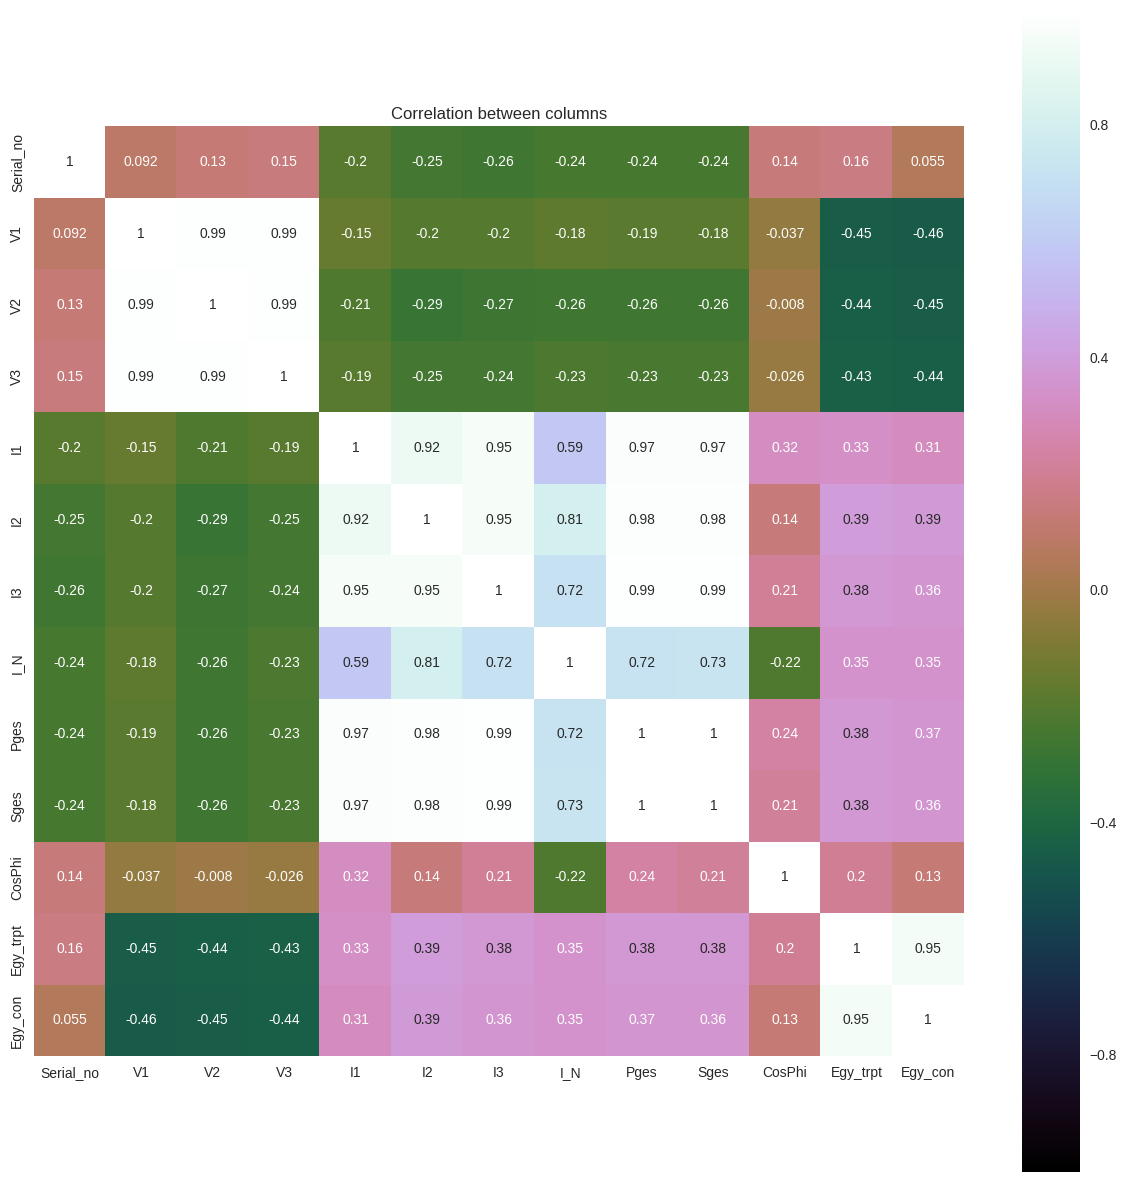

In [13]:
correlation = dfs.corr()
#plt.figure(figsize=(13,13))
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between columns')

fig.savefig('Correlation_part1 Torschlag_Trafo_4654988_5259787.png')

# Statistics calculation implementation

# Plot statistics by grouping location 

In [14]:
dfs_loc = dfs.groupby('Location') # groupby location wise
#df_loc_part1 = dfs_drop_part1.groupby('Location') # groupby location wise

# Describe() : Produces the basic statistics of the DataFrame

In [15]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe()

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
count,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000
mean,234.427341,234.053418,233.942616,15.265299,29.452800,23.880589,16.693758,15111.203362,16031.126066,0.895073,20995.811589,22155232.676834
std,1.682975,1.698771,1.692662,17.555159,25.298612,21.902466,9.331964,14006.250072,14803.308729,0.047804,3651.941648,7864584.397874
min,227.520000,227.300000,227.150000,1.460000,3.160000,2.880000,4.680000,212.940000,3028.480000,0.480000,13455.000000,12801662.720000
25%,233.370000,232.940000,232.850000,6.180000,15.020000,12.120000,10.190000,7855.150000,8215.310000,0.880000,18501.000000,13125280.000000
50%,234.490000,234.130000,234.010000,8.460000,18.810000,14.810000,13.110000,9458.770000,9935.930000,0.900000,23911.000000,28158935.040000
75%,235.660000,235.340000,235.190000,13.890000,29.610000,24.260000,20.750000,13916.080000,14787.560000,0.930000,23911.000000,29121403.520000
max,239.140000,238.790000,238.620000,143.700000,174.470000,165.250000,90.300000,108791.850000,112582.720000,1.010000,24110.000000,29741793.280000


# Saving the basic statistics to csv

In [16]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe().to_csv(r'Torschlag_Trafo_4654988_5259787_describe.csv',sep=',')

In [26]:
#dfs.iloc[0:500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_1.csv',sep=',')

In [27]:
#dfs.iloc[500000:1000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_2.csv',sep=',')

In [28]:
#dfs.iloc[1000000:1500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_3.csv',sep=',')

In [29]:
#dfs.iloc[1500000:2000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_4.csv',sep=',')

In [30]:
#dfs.iloc[2000000:2500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_5.csv',sep=',')

In [31]:
#dfs.iloc[2500000:3000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_6.csv',sep=',')

In [32]:
#dfs.iloc[3000000:3500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_7.csv',sep=',')

In [33]:
#dfs.iloc[3500000:4000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_8.csv',sep=',')

In [34]:
#dfs.iloc[4000000:4500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_9.csv',sep=',')

In [35]:
#dfs.iloc[4500000:-1][:].describe().to_csv(r'Torschlag_Trafo_corr_last.csv',sep=',')

# Below you will calculate the correlation on the data grouped by location

In [17]:
#dfs_grp_loc = dfs.iloc[0:500000][:]

In [18]:
#dfs_grp_loc.groupby('Location').describe()

In [17]:
dfs_loc.corr(method='pearson', min_periods=1)

CosPhi   Egy_con  Egy_trpt  \
Location                                                                   
Torschlag_Trafo_26122015.csv CosPhi              NaN       NaN       NaN   
                             Egy_con             NaN       NaN       NaN   
                             Egy_trpt            NaN       NaN       NaN   
                             I1                  NaN       NaN       NaN   
                             I2                  NaN       NaN       NaN   
                             I3                  NaN       NaN       NaN   
                             I_N                 NaN       NaN       NaN   
                             Pges                NaN       NaN       NaN   
                             Serial_no           NaN       NaN       NaN   
                             Sges                NaN       NaN       NaN   
                             V1                  NaN       NaN       NaN   
                             V2                  NaN       NaN       NaN   
                             V3                  NaN       NaN       NaN   
Torschlag_Trafo_27012016.csv CosPhi     1.000000e+00 -0.011483       NaN   
                             Egy_con   -1.148291e-02  1.000000       NaN   
                             Egy_trpt            NaN       NaN       NaN   
                             I1         4.253500e-01 -0.004553       NaN   
                             I2         2.417279e-01  0.017944       NaN   
                             I3         3.454782e-01  0.048784       NaN   
                             I_N       -1.936030e-01  0.101911       NaN   
                             Pges       3.519095e-01  0.027533       NaN   
                             Serial_no -2.704253e-02  0.977875       NaN   
                             Sges       3.319515e-01  0.022884       NaN   
                             V1         2.193886e-03  0.394741       NaN   
                             V2         4.996183e-03  0.425839       NaN   
                             V3         1.162962e-02  0.401954       NaN   
Torschlag_Trafo_27122015.csv CosPhi     1.000000e+00 -0.028073 -0.047209   
                             Egy_con   -2.807344e-02  1.000000  0.876226   
                             Egy_trpt  -4.720923e-02  0.876226  1.000000   
                             I1         5.759070e-01  0.262480  0.207929   
...                                              ...       ...       ...   
Torschlag_Trafo_29012016.csv Sges       1.349266e-01  0.007456 -0.159456   
                             V1         4.833138e-02  0.171228  0.015311   
                             V2         1.216139e-01  0.101553 -0.015687   
                             V3         6.331940e-02  0.158583  0.016074   
Torschlag_Trafo_29122015.csv CosPhi     1.000000e+00 -0.150920  0.096156   
                             Egy_con   -1.509200e-01  1.000000  0.876196   
                             Egy_trpt   9.615633e-02  0.876196  1.000000   
                             I1         1.805906e-01  0.096186  0.177051   
                             I2        -5.280419e-01  0.328207  0.224187   
                             I3        -4.995481e-01  0.248194  0.089239   
                             I_N       -8.508326e-01  0.229867  0.053869   
                             Pges      -4.596410e-01  0.383244  0.285171   
                             Serial_no -1.786653e-01  0.997744  0.854083   
                             Sges      -5.192207e-01  0.362646  0.245321   
                             V1         8.930056e-07 -0.003588  0.015258   
                             V2         1.113033e-02 -0.055962 -0.039638   
                             V3        -7.311020e-03 -0.024947 -0.007144   
Torschlag_Trafo_30012016.csv CosPhi     1.000000e+00 -0.070240       NaN   
                             Egy_con   -7.024021e-02  1.000000       NaN   
                             Egy_trpt            NaN       NaN       NaN   
                  

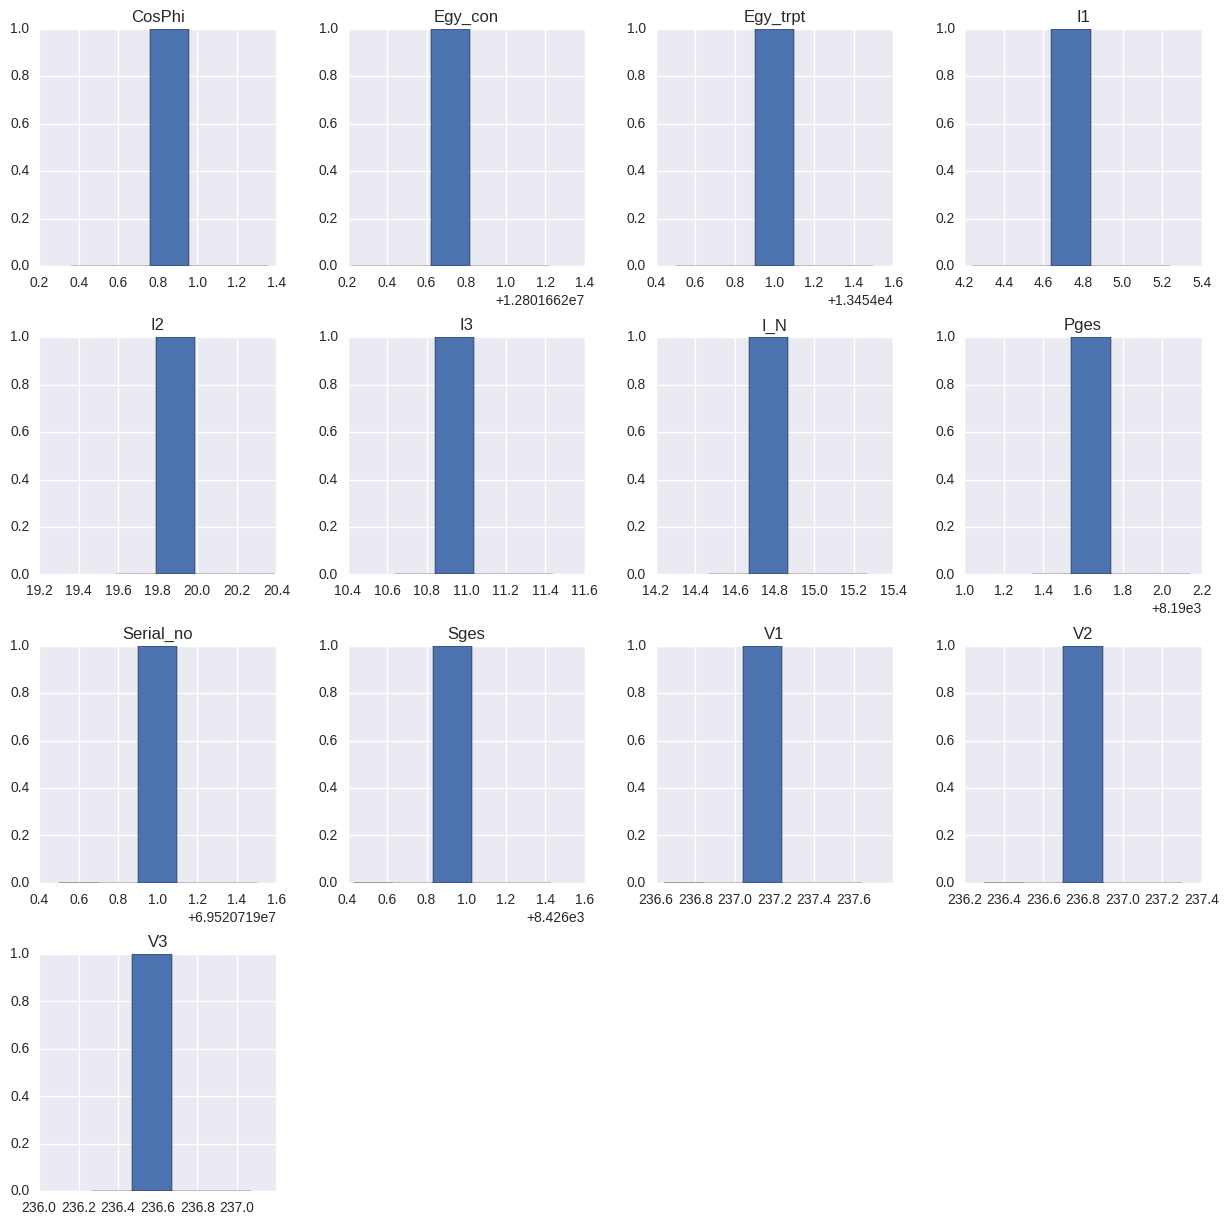

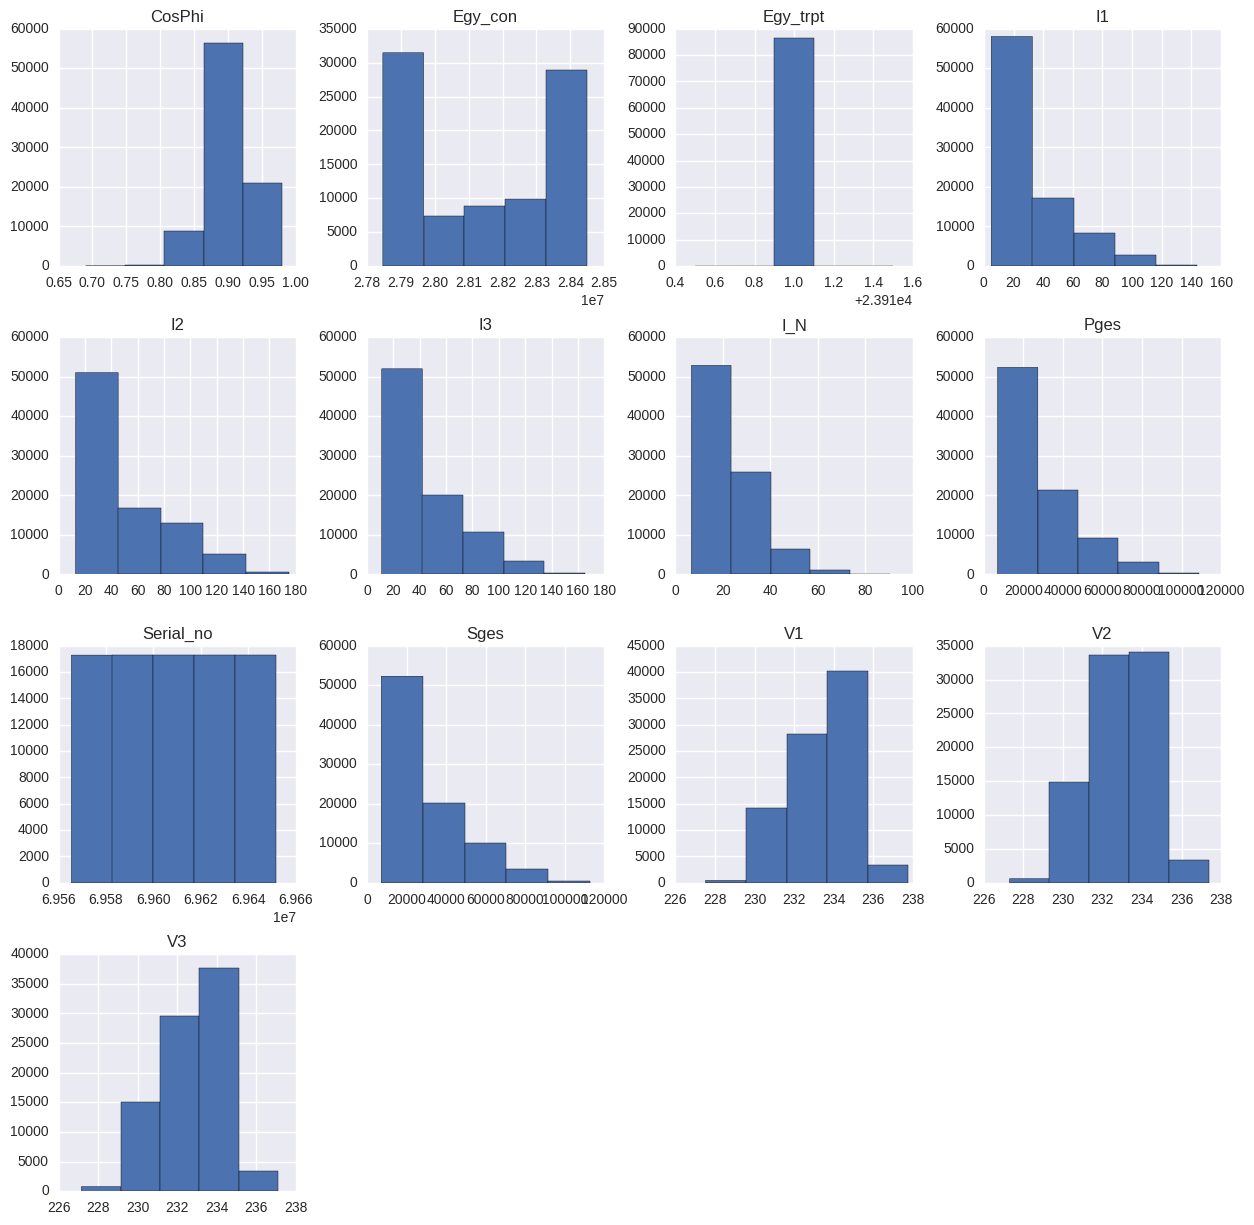

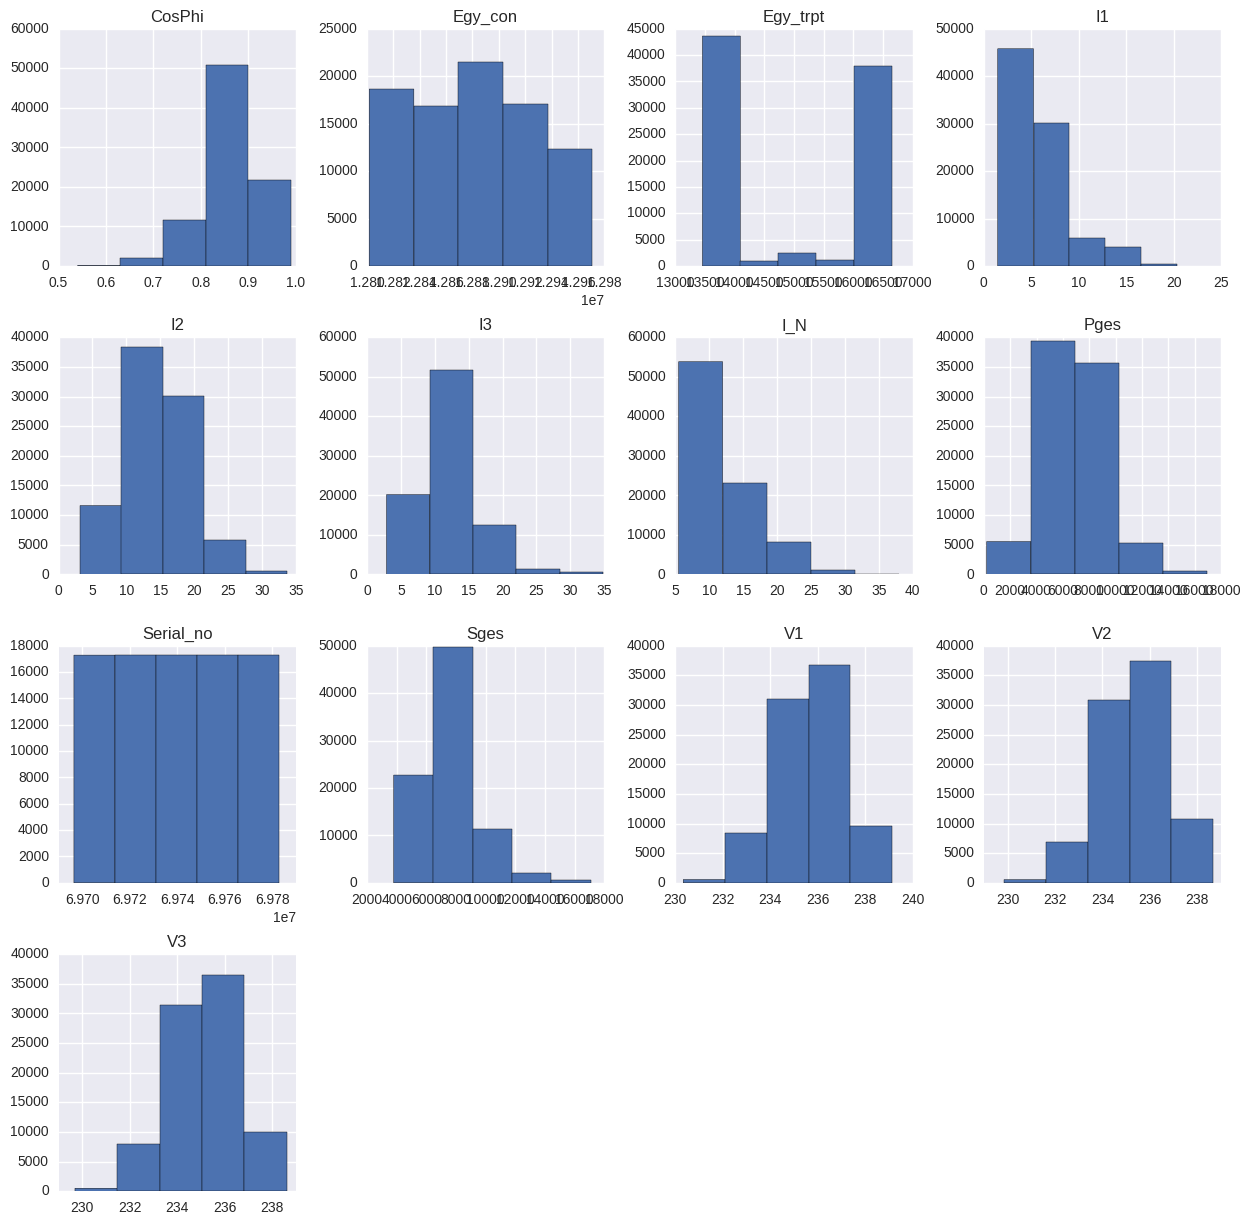

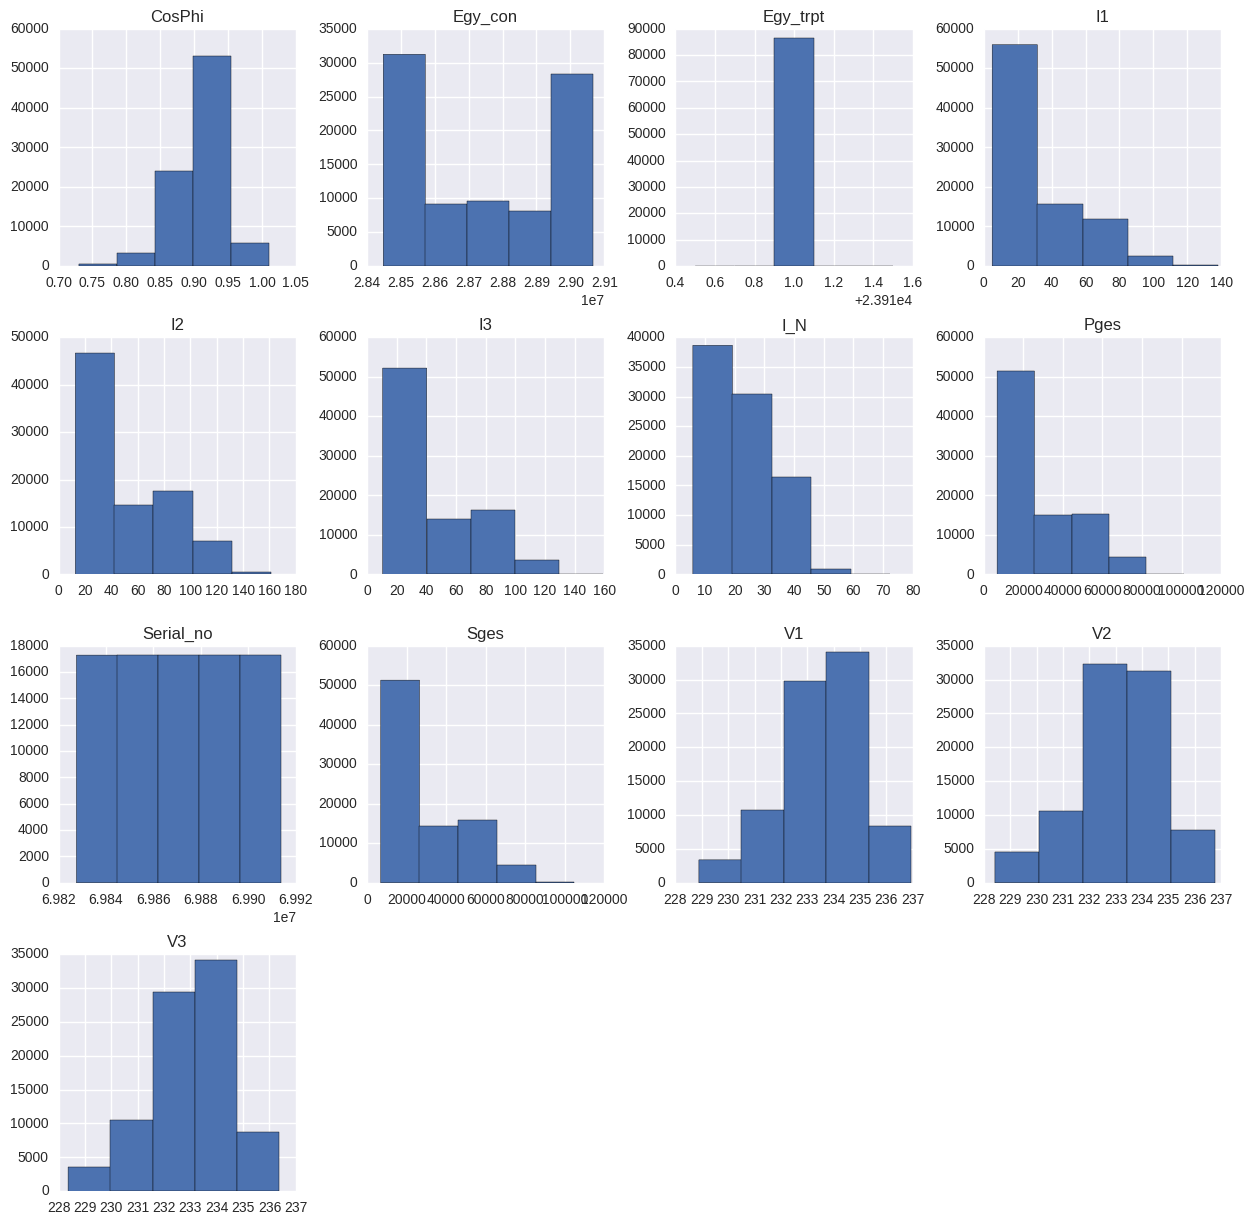

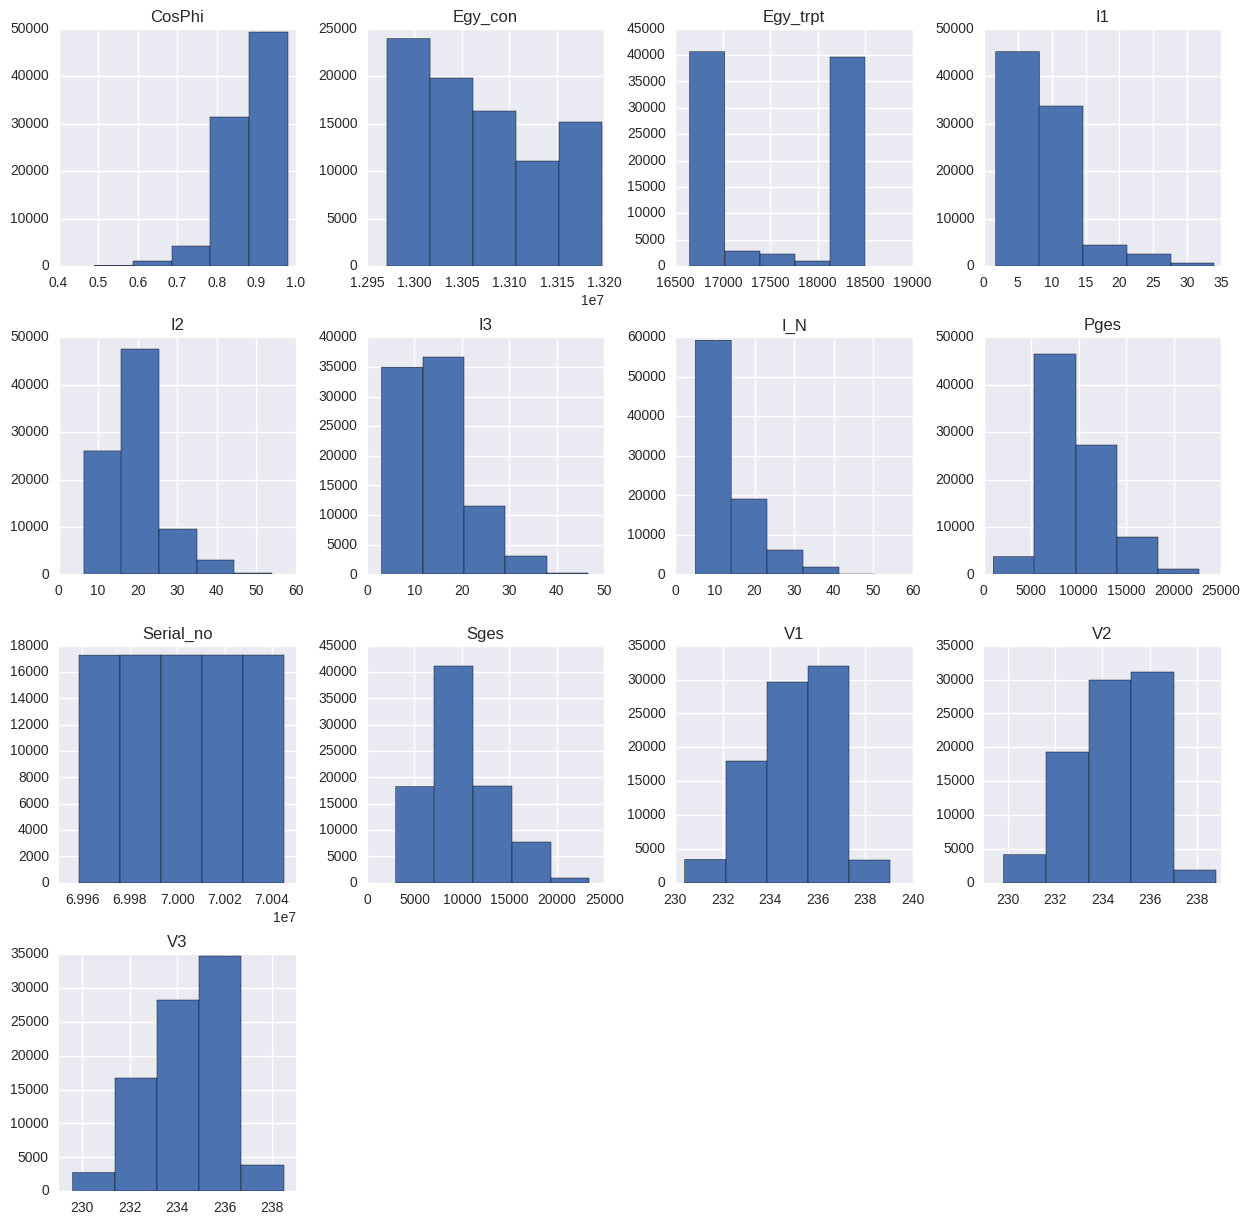

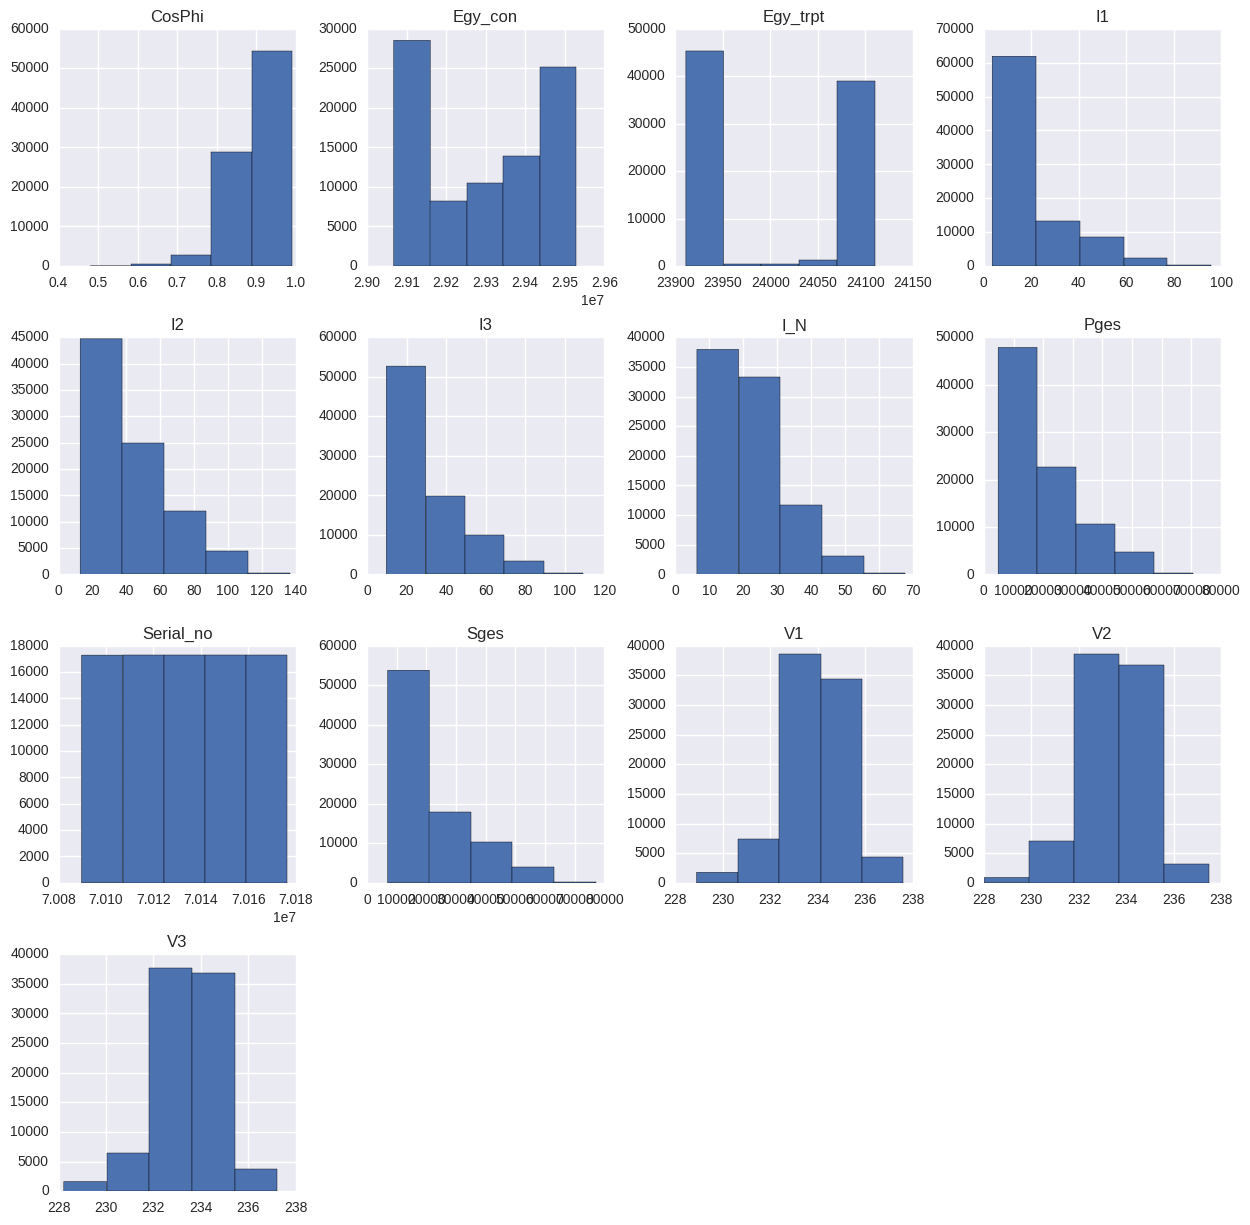

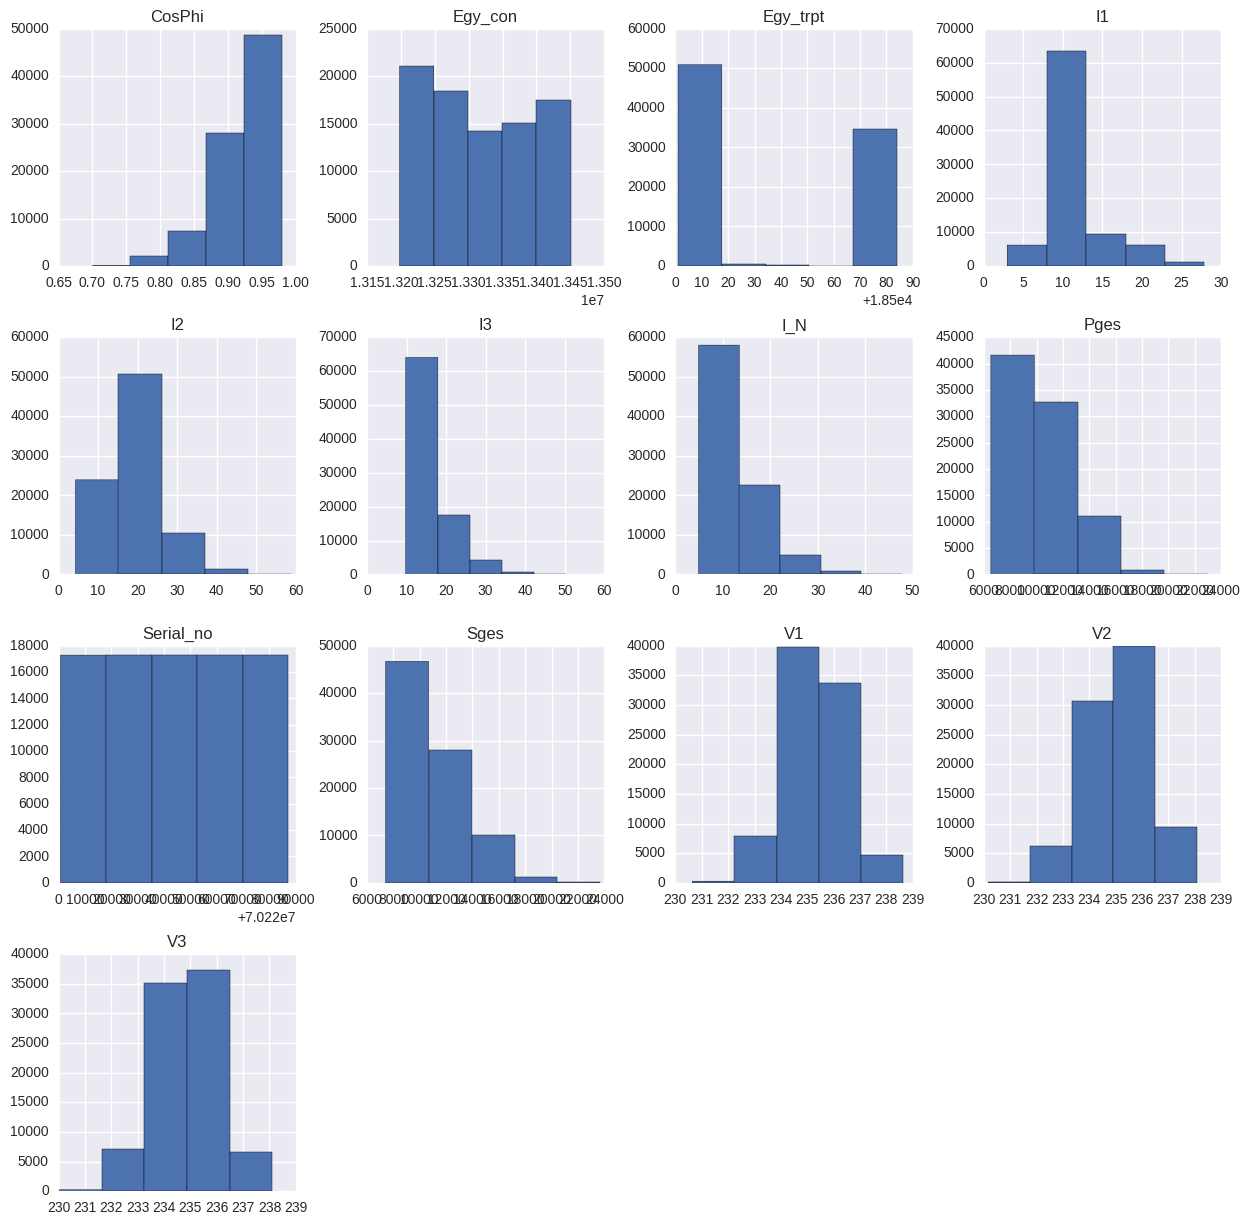

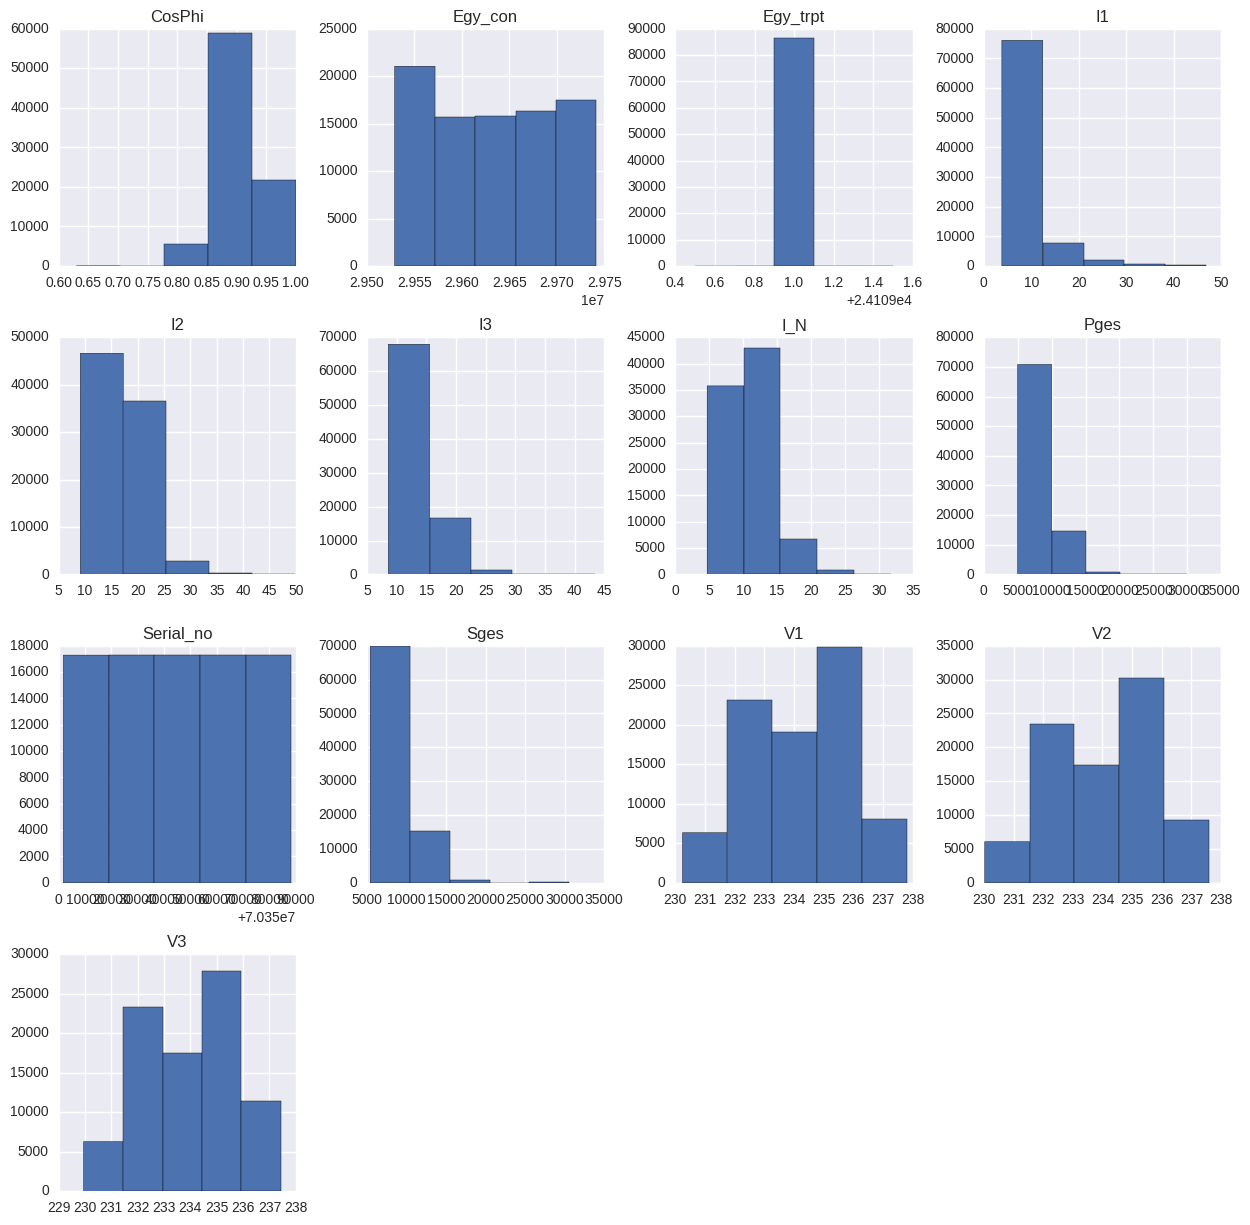

In [18]:
dfs_loc.hist(bins=5,figsize=(15,15))
plt.savefig('Torschlag_Trafo_groupby_location_pearson_corr_4654988_5259787.png')
    

# Compute only the mean of the data grouped by location and visualize

In [19]:
df_st_mean = dfs_loc.mean()
df_st_mean

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Location,,,,,,,,,,,,,
Torschlag_Trafo_26122015.csv,69520720,237.140000,236.800000,236.570000,4.740000,19.890000,10.940000,14.770000,8191.640000,8426.930000,0.860000,13455.000000,12801662.720000
Torschlag_Trafo_27012016.csv,69608590,233.353621,232.910418,232.747068,26.176597,47.615716,40.296534,22.608220,25050.508965,26597.638380,0.902294,23911.000000,28142431.500098
Torschlag_Trafo_27122015.csv,69739660,235.695633,235.342380,235.158797,5.832395,14.354540,12.037404,12.068471,6922.645290,7583.180455,0.863363,14946.375521,12881106.662060
Torschlag_Trafo_28012016.csv,69870730,233.518011,233.106680,232.985258,27.059499,48.228062,40.959613,22.574058,25816.221902,27075.776873,0.907721,23911.000000,28744384.984860
Torschlag_Trafo_28122015.csv,70001800,234.989276,234.451867,234.435048,8.897007,19.527519,14.586521,13.678608,9386.603392,10085.734326,0.882613,17554.387407,13070785.192400
Torschlag_Trafo_29012016.csv,70132870,233.913940,233.461894,233.436607,18.436546,40.181788,29.212133,22.049251,19229.806166,20520.499038,0.886035,24003.388090,29297993.213185
Torschlag_Trafo_29122015.csv,70263940,235.304778,235.060174,234.881577,11.578993,19.135640,16.319152,12.672428,10512.001262,11053.413541,0.918626,18534.651123,13318150.907512
Torschlag_Trafo_30012016.csv,70395010,234.216081,234.040466,233.953912,8.876305,17.126654,13.753103,11.205358,8860.831684,9301.850155,0.904863,24110.000000,29631953.832918


In [20]:
df_st_mean.to_csv(r'Torschlag_trafo_mean_groupby_location_4654988_5259787.csv',sep=',')

# Plot the groupby location 

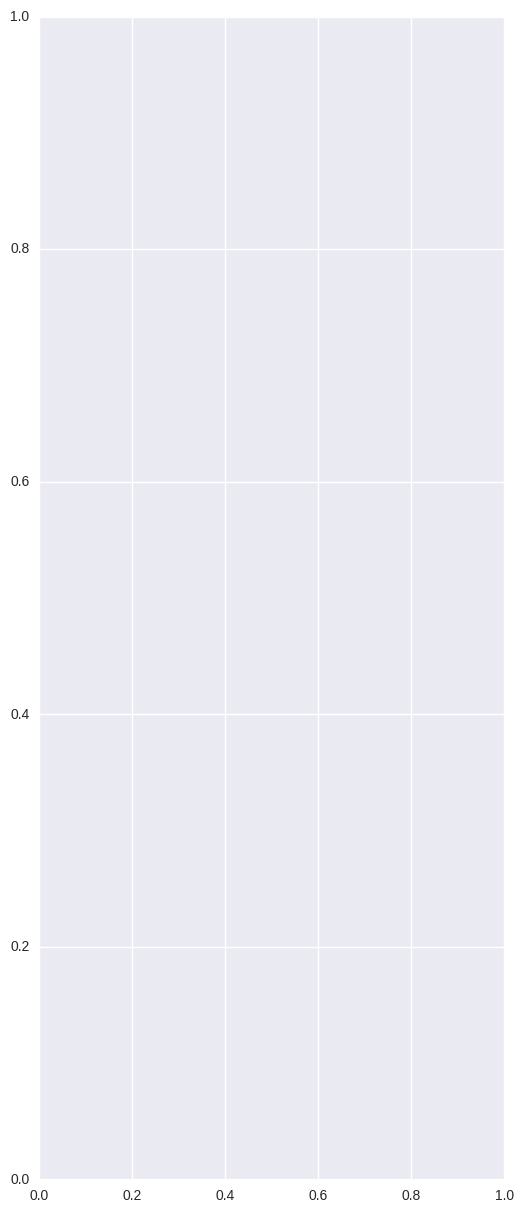

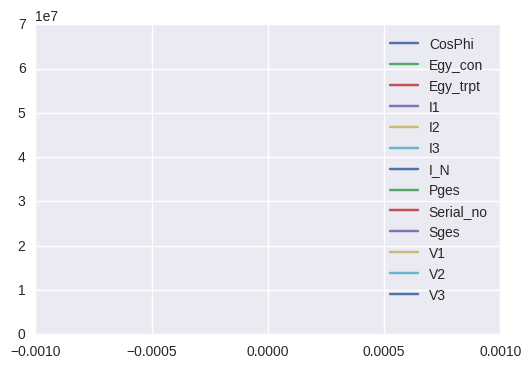

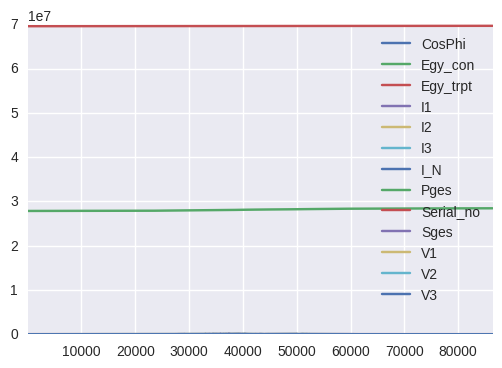

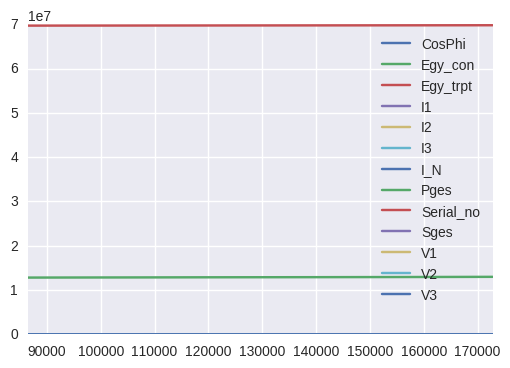

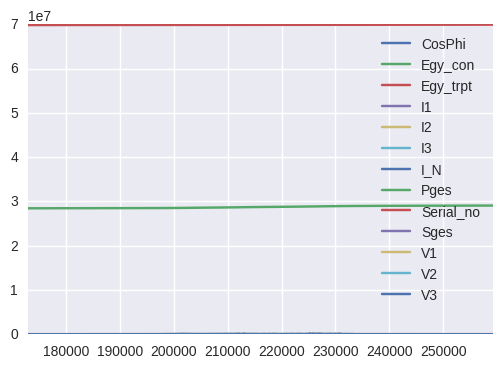

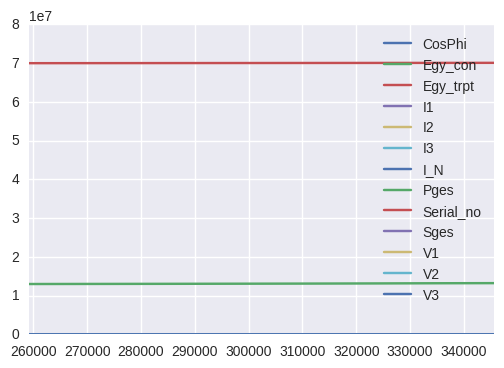

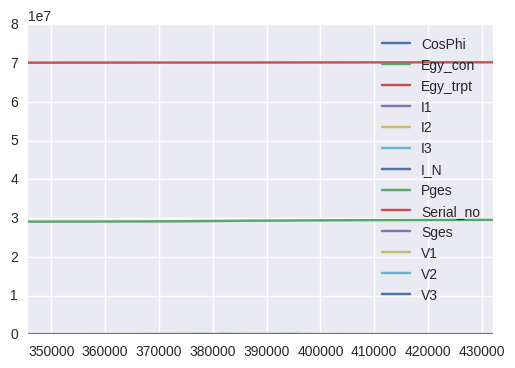

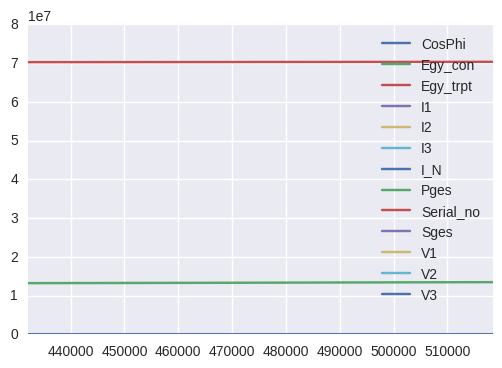

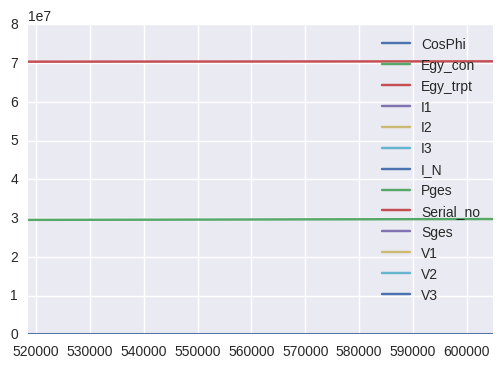

In [21]:
fig1,ax2 = plt.subplots(figsize=(6,15))
bp = dfs_loc.plot(kind='kde', ax2 = ax2, legend=False)


# PCA implementation

In [22]:
dfs_drop = dfs.drop(labels=['Serial_no', 'Date', 'Time','Location'],axis=1)

In [23]:
dfs_drop.columns

Index([u'V1', u'V2', u'V3', u'I1', u'I2', u'I3', u'I_N', u'Pges', u'Sges',
       u'CosPhi', u'Egy_trpt', u'Egy_con'],
      dtype='object')

In [24]:
X = dfs_drop.iloc[:,0:6].values
X

array([[ 237.14,  236.8 ,  236.57,    4.74,   19.89,   10.94],
       [ 232.55,  232.18,  231.9 ,    7.75,   33.33,   18.54],
       [ 232.55,  232.18,  231.9 ,    7.75,   33.33,   18.54],
       ..., 
       [ 233.13,  232.8 ,  232.42,    8.2 ,   14.74,   11.79],
       [ 233.21,  233.31,  233.43,    8.3 ,   14.6 ,   11.92],
       [ 233.21,  233.31,  233.43,    8.3 ,   14.6 ,   11.92]])

In [25]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [26]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [27]:
Y_sklearn.shape

(604800, 6)

In [28]:
n_components = pd.DataFrame(Y_sklearn, columns=('V1', 'V2', 'V3', 'I1', 'I2', 'I3'))
n_components.head()

,V1,V2,V3,I1,I2,I3
0,-2.634134,1.215219,0.224451,0.034141,-0.004787,-0.076683
1,1.247988,-1.575518,0.352603,0.069328,-0.004135,-0.118626
2,1.247988,-1.575518,0.352603,0.069328,-0.004135,-0.118626
3,1.247988,-1.575518,0.352603,0.069328,-0.004135,-0.118626
4,1.247988,-1.575518,0.352603,0.069328,-0.004135,-0.118626


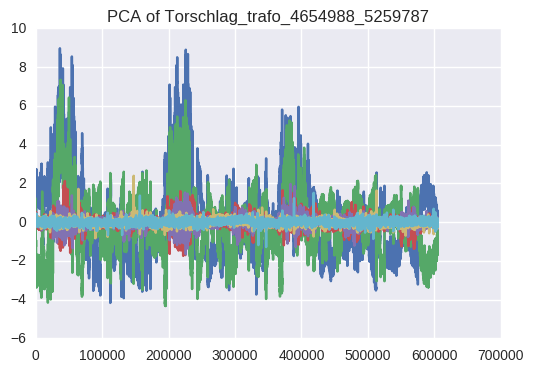

In [29]:
fig = plt.figure() 
plt.legend(loc='upper right')
plt.plot(n_components)
plt.title("PCA of Torschlag_trafo_4654988_5259787")

fig.savefig('PCA of Torschlag_Trafo_4654988_5259787.png')


# Plot voltage vs time

# Plot V1 and I1 vs Time of all locations extracted from SQL.

In [30]:
#dfs.iloc[500000:1000000][:].groupby('Location').describe()
dfs['Location'].unique()

array(['Torschlag_Trafo_26122015.csv', 'Torschlag_Trafo_27012016.csv',
       'Torschlag_Trafo_27122015.csv', 'Torschlag_Trafo_28012016.csv',
       'Torschlag_Trafo_28122015.csv', 'Torschlag_Trafo_29012016.csv',
       'Torschlag_Trafo_29122015.csv', 'Torschlag_Trafo_30012016.csv'], dtype=object)

In [31]:
def plotfunc(ax, a, b):
    return ax.plot(a, b)

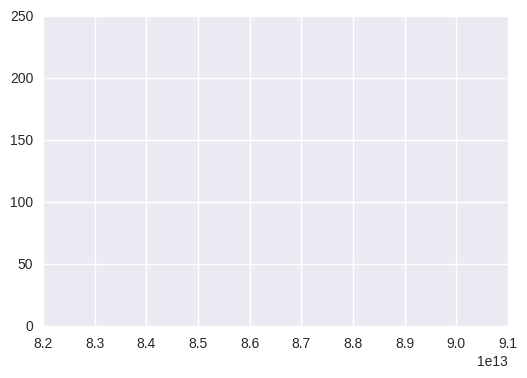

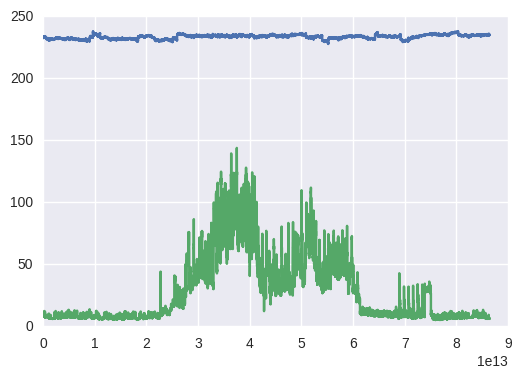

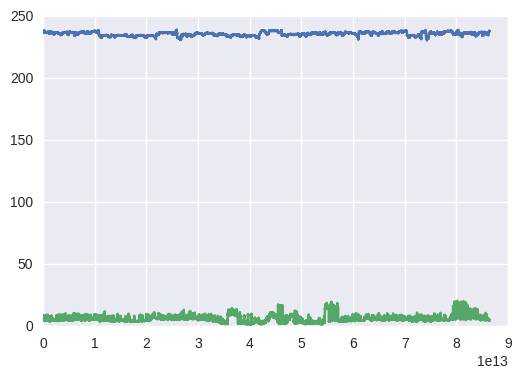

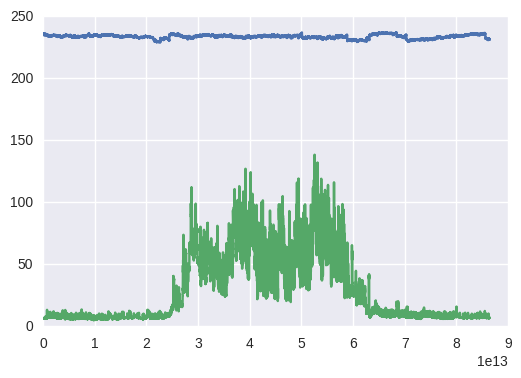

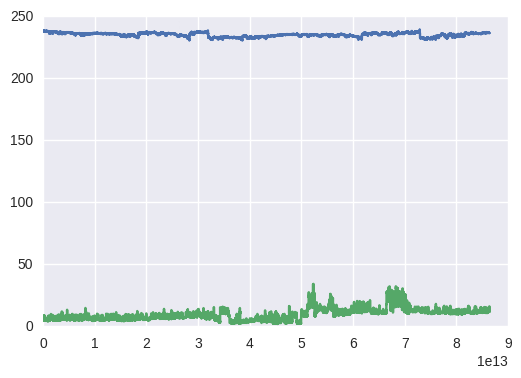

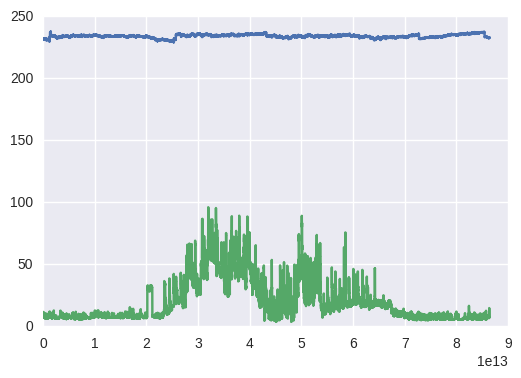

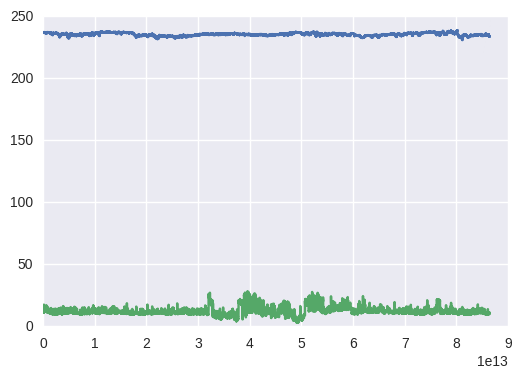

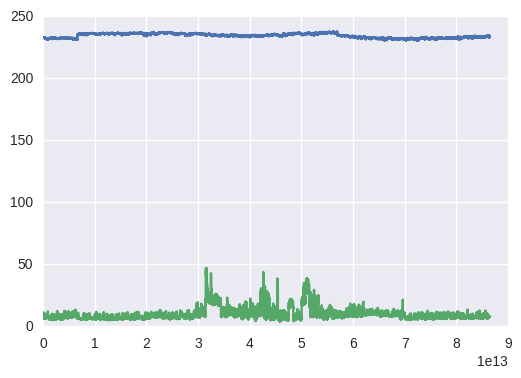

In [32]:
for loc in iter(dfs['Location'].unique()):
    fig, ax = plt.subplots(1,1)
    b = dfs['V1'].where (dfs['Location'] == loc)
    b1 = dfs['I1'].where (dfs['Location'] == loc)
    a = dfs['Time'].where (dfs['Location'] == loc)
    l1 = plotfunc(ax, a, b)
    l2 = plotfunc(ax, a, b1)
    plt.savefig('V1_I1_Time of %s.png' % loc)
    plt.show()